# CNN

## CIFAR-10
number of images : 25 <br>
figure size : 10x10

170498071/170498071 [==============================] - 3s 0us/step


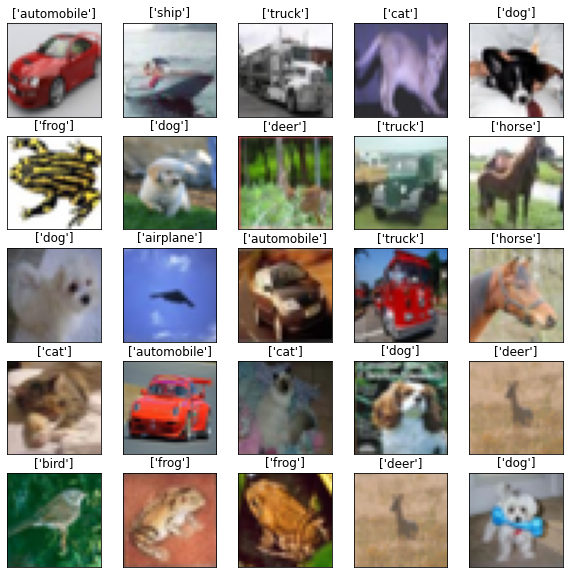

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
cifar10_labels = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10, 10)) # Set the figure size
for i in range(n_image):
    cifar_image = plt.subplot(5, 5, i+1)
    plt.imshow(x_train[rand_idx[i]])
    plt.title(cifar10_labels[y_train[rand_idx[i]]])
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

plt.show()

## Setup
batch size : 32 <br>
number of epochs : 20 <br>
number of classes : 10 <br>

In [3]:
batch_size = 32
epochs = 20
n_classes = 10

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

## Build the model
conv2d_1 <br>
conv2d_2 <br>
max_pooling2d_1 <br>
conv2d_3 <br>
conv2d_4 <br>
max_pooling2d_2 <br>
fully_connected_1 <br>
fully_connected_2

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

# conv2d_1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# conv2d_2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# max_pooling2d_1
model.add(MaxPooling2D(pool_size=(2, 2)))

# conv2d_3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# conv2d_4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# max_pooling2d_2
model.add(MaxPooling2D(pool_size=(2, 2)))

# fully_connected_1
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# fully_connected_2
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

## Train the model
using GPU

In [5]:
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')

# Normalize the data
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 18s 6ms/step - loss: 1.5396 - accuracy: 0.4379 - val_loss: 1.1599 - val_accuracy: 0.5726
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1294 - accuracy: 0.5998 - val_loss: 1.0066 - val_accuracy: 0.6478
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9484 - accuracy: 0.6697 - val_loss: 0.8553 - val_accuracy: 0.7011
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8307 - accuracy: 0.7093 - val_loss: 0.8207 - val_accuracy: 0.7154
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7479 - accuracy: 0.7405 - val_loss: 0.7589 - val_accuracy: 0.7403
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6912 - accuracy: 0.7583 - val_loss: 0.7340 - val_accuracy: 0.7460
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6325 - accuracy: 0.7801 - val_loss: 0.7306 - val_accurac

## Visualize the training process

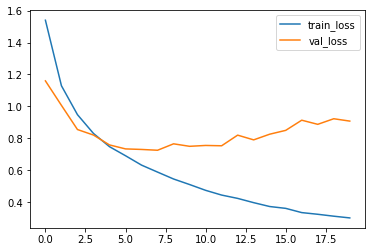

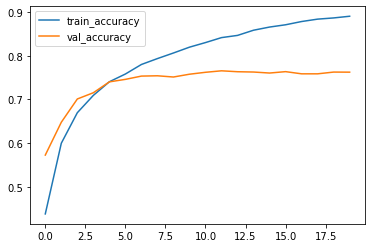

In [7]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(np.arange(len(train_loss)), train_loss, label='train_loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='train_accuracy')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_accuracy')
plt.legend()
plt.show()

## Evaluate the model

In [8]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 0.9080697298049927
Test accuracy: 0.762499988079071


## Predict

1/1 [==============================] - 0s 191ms/step


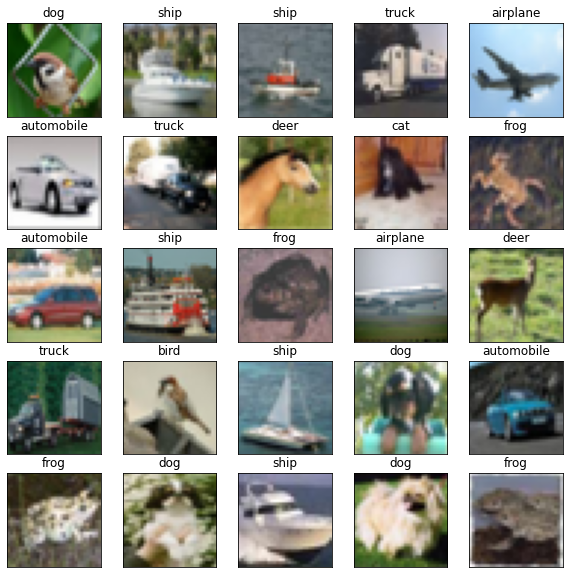

In [9]:
n_imgae = 25
rand_idx = np.random.randint(0, len(x_test), n_imgae)

y_rand = model.predict(x_test[rand_idx])
predicted_classes = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10)) # Set the figure size
for i in range(n_imgae):
    cifar_image = plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    plt.title(cifar10_labels[predicted_classes[i]])
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.show()

## Save the model

In [10]:
from keras.models import load_model

model.save('cifar10_model.h5')